In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
from tqdm import tqdm
import geopandas as gpd
from pomme.carto_resultats import filtre_geo, filtre_election, filtre_annee, filtre_tour, process_results, plot_results


In [131]:
results= pd.read_csv('../db/results/all_results_93.csv')

/var/folders/rc/0g2xxgc57fq40kc5jwsm7h_c0000gn/T/ipykernel_66995/3173135276.py:1: DtypeWarning: Columns (18,19,21,22,24,25,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  results= pd.read_csv('../db/results/all_results_93.csv')


In [140]:
nuance='DRTE'
annee_debut=2022

In [148]:
results[(results["Nuance"]==nuance) & (results["Annee"]>=annee_debut)].groupby(['Libellé de la commune','Election'])['Voix'].sum().reset_index().sort_values(by='Voix', ascending=False).set_index('Libellé de la commune').rename({'Voix':'Nombre moyen de voix pour la nuance'}, axis=1).groupby('Libellé de la commune')['Nombre moyen de voix pour la nuance'].mean().reset_index().sort_values(by='Nombre moyen de voix pour la nuance', ascending=False).head(10)

,Libellé de la commune,Nombre moyen de voix pour la nuance
1,Aulnay-sous-Bois,6017.0


In [141]:
results[(results["Nuance"]==nuance) & (results["Annee"]>=annee_debut)].groupby(['Libellé de la commune','Election'])['Voix'].sum().reset_index().sort_values(by='Voix', ascending=False).head(10).set_index('Libellé de la commune').rename({'Voix':'Nombre moyen de voix pour la nuance'}, axis=1)
results[(results["Nuance"]==nuance) & (results["Annee"]>=annee_debut)].groupby(['Libellé de la commune','Election'])['Voix'].sum().reset_index().sort_values(by='Voix', ascending=False).head(10).set_index('Libellé de la commune').rename({'Voix':'Nombre moyen de voix pour la nuance'}, axis=1)

,Election,Nombre moyen de voix pour la nuance
Libellé de la commune,,
Aulnay-sous-Bois,leg,10840.0
Les Pavillons-sous-Bois,leg,3283.0
Bondy,leg,2291.0
Gagny,leg,1533.0
Noisy-le-Grand,leg,1197.0
Aulnay-sous-Bois,pres,1194.0
Noisy-le-Grand,pres,1179.0
Rosny-sous-Bois,leg,1114.0
Villemomble,leg,1000.0


In [137]:
results[results['Nuance'] == 'CENTRE-DROIT'].groupby('Nom Bureau Vote')['Voix'].mean().reset_index().sort_values(by='Voix', ascending=False).head(3).set_index('Nom Bureau Vote').rename({'Voix':'Nombre moyen de voix pour la nuance'}, axis=1)

,Nom Bureau Vote,Voix
278,Ecole mixte Foch 2,305.4
40,Collège Pierre-André Houël,292.0
51,Ecole Blaise Pascal (Hall),286.1


In [133]:
results.columns

Index(['Unnamed: 0', 'Tour', 'Code du département', 'Code de la commune',
       'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Votants',
       'Exprimés', 'N°Panneau', 'Nom', 'Prénom', 'Nuance', 'Voix', 'Election',
       'Annee', 'Code de la circonscription', 'Code du canton',
       'Libellé du département', 'Libellé de la circonscription',
       'Abstentions', '% Abs/Ins', '% Vot/Ins', 'Blancs', '% Blancs/Ins',
       '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', '% Exp/Ins',
       '% Exp/Vot', '% Voix/Ins', '% Voix/Exp', 'Code INSEE', 'Bureau de vote',
       'Code Bureau Vote', 'Heure d'ouverture', 'Heure de fermeture',
       'Code Postal', 'Ville', 'Nom Bureau Vote', 'Adresse',
       'Adresse Substitution', 'Coordonnées', 'Département', 'uniq_bdv',
       'id_bv'],
      dtype='object')

In [117]:
len(np.unique(results_by_nuance["Nuance"]))//2+1

3

In [130]:
results_by_nuance[results_by_nuance["Nuance"]==nuance].columns

Index(['Nuance', 'Annee', 'Election', 'Voix'], dtype='object')

In [129]:
results_by_nuance[results_by_nuance["Nuance"]==nuance].groupby('Nom Bureau Vote')['Voix'].sum().reset_index()

KeyError: 'id_bv'

7it [00:00, 31.42it/s]


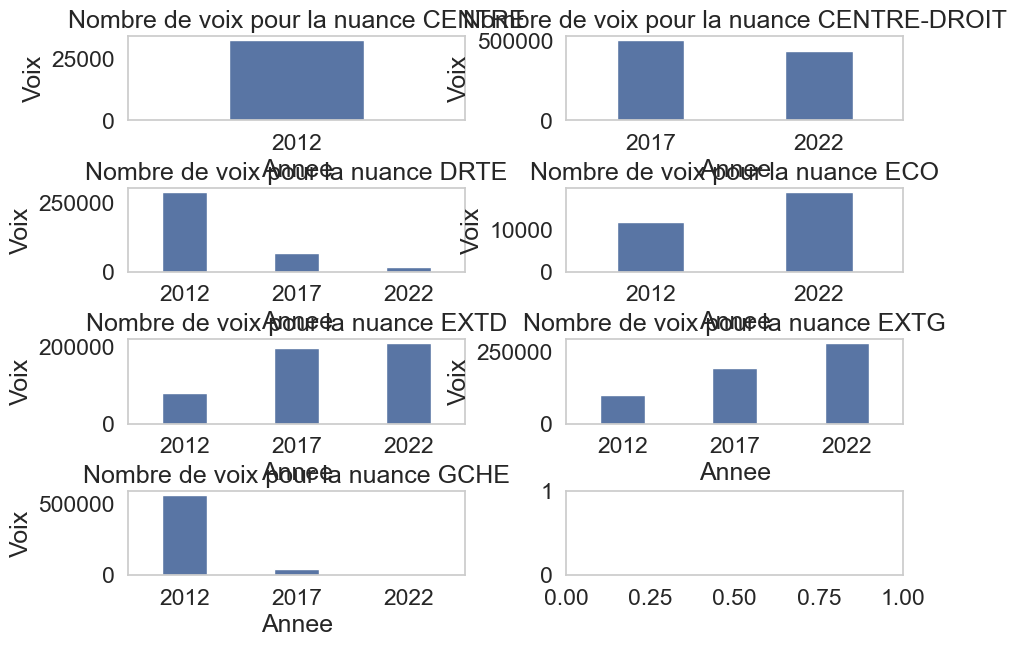

In [128]:
#get for each nuance, , sum of votes for each election and year

results_by_nuance = results.groupby(["Nuance", "Annee", "Election"])['Voix'].sum().reset_index()

results_by_nuance=results_by_nuance[results_by_nuance['Election']=='pres']

#For each nunance, plot it with seaborn
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

#plot it in bar for each nuance

#Subplot for each nuance
# create a fig, so that i have subplots for each nuance


fig, axes = plt.subplots(len(np.unique(results_by_nuance["Nuance"]))//2+1,2, figsize=(10,7))
plt.subplots_adjust(hspace=0.8, wspace=0.3)
for nuance, ax in tqdm(zip(np.unique(results_by_nuance["Nuance"]), axes.flatten())):
    ax.set_title(f'Nombre de voix pour la nuance {nuance}')
    sns.barplot(x="Annee", y="Voix", data=results_by_nuance[results_by_nuance["Nuance"]==nuance], ax=ax, width=.4)
plt.show()

In [107]:
results[(results['Election']=='pres') & (results.Annee==2017)]

,Unnamed: 0,Tour,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Votants,Exprimés,N°Panneau,...,Heure de fermeture,Code Postal,Ville,Nom Bureau Vote,Adresse,Adresse Substitution,Coordonnées,Département,uniq_bdv,id_bv
64562,5418601,1,93,1,Aubervilliers,1.0,1042.0,688.0,672.0,NaN,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
64563,5418602,1,93,1,Aubervilliers,2.0,1186.0,798.0,765.0,NaN,...,20.0,93300.0,Aubervilliers,Ecole François Dolto,"14,rue Paul Doumer","14,rue Paul Doumer","48.916289, 2.387002",93,Ecole François Dolto - Aubervilliers,93001_2
64564,5418603,1,93,1,Aubervilliers,3.0,1107.0,690.0,662.0,NaN,...,20.0,93300.0,Aubervilliers,Gymnase Robespierre,"21, rue Danielle Casanova","21, rue Danielle Casanova","48.917633, 2.395183",93,Gymnase Robespierre - Aubervilliers,93001_3
64565,5418604,1,93,1,Aubervilliers,4.0,1022.0,666.0,655.0,NaN,...,20.0,93300.0,Aubervilliers,Gymnase Robespierre,"21, rue Danielle Casanova","21, rue Danielle Casanova","48.917633, 2.395183",93,Gymnase Robespierre - Aubervilliers,93001_4
64566,5418605,1,93,1,Aubervilliers,5.0,960.0,656.0,641.0,NaN,...,20.0,93300.0,Aubervilliers,Ecole Robespierre,Rue Adrien Huzard,Rue Adrien Huzard,"48.920348, 2.390672",93,Ecole Robespierre - Aubervilliers,93001_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74918,6211635,1,93,79,Villetaneuse,2.0,1039.0,687.0,608.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole Jules Verne,"105, Rue Maurice Grandcoing","105, Rue Maurice Grandcoing","48.966524, 2.344609",93,Ecole Jules Verne - Villetaneuse,93079_2
74919,6211636,1,93,79,Villetaneuse,3.0,769.0,506.0,454.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole maternelle Henri Wallon,Rue Henri Wallon,Rue Henri Wallon,"48.951467, 2.343869",93,Ecole maternelle Henri Wallon - Villetaneuse,93079_3
74920,6211637,1,93,79,Villetaneuse,4.0,977.0,646.0,590.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole Jules Vallès,Rue Paul Langevin,Rue Paul Langevin,"48.951974, 2.340658",93,Ecole Jules Vallès - Villetaneuse,93079_4
74921,6211638,1,93,79,Villetaneuse,5.0,955.0,595.0,539.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole maternelle Jacqueline Quatremaire,"11 Ter, Rue Carnot","11 Ter, Rue Carnot","48.953471, 2.338846",93,Ecole maternelle Jacqueline Quatremaire - Vil...,93079_5


In [95]:
results= pd.read_csv('../db/results/all_results_93.csv')
gdf = gpd.read_file(f"../db/carto/contours_93.geojson",crs="epsg:4326")
params= {
    "filtre_geo_cat" : "dep",
    "filtre_geo_val" : "93",
    "filtre_election_val" : "pres",
    "filtre_annee_val" : 2017,
    "filtre_tour_val" : 2, 
    "Nuance": "CENTRE-DROIT"}


/var/folders/rc/0g2xxgc57fq40kc5jwsm7h_c0000gn/T/ipykernel_66995/2116890618.py:1: DtypeWarning: Columns (18,19,21,22,24,25,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  results= pd.read_csv('../db/results/all_results_93.csv')


In [96]:
results

,Unnamed: 0,Tour,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Votants,Exprimés,N°Panneau,...,Heure de fermeture,Code Postal,Ville,Nom Bureau Vote,Adresse,Adresse Substitution,Coordonnées,Département,uniq_bdv,id_bv
0,804373,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,6.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
1,804374,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,7.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
2,804375,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,8.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
3,804376,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,9.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
4,804377,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,69.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86076,7140714,2,93,79,Villetaneuse,2.0,1119.0,596.0,521.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole Jules Verne,"105, Rue Maurice Grandcoing","105, Rue Maurice Grandcoing","48.966524, 2.344609",93,Ecole Jules Verne - Villetaneuse,93079_2
86077,7140715,2,93,79,Villetaneuse,3.0,767.0,481.0,428.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole maternelle Henri Wallon,Rue Henri Wallon,Rue Henri Wallon,"48.951467, 2.343869",93,Ecole maternelle Henri Wallon - Villetaneuse,93079_3
86078,7140716,2,93,79,Villetaneuse,4.0,974.0,535.0,468.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole Jules Vallès,Rue Paul Langevin,Rue Paul Langevin,"48.951974, 2.340658",93,Ecole Jules Vallès - Villetaneuse,93079_4
86079,7140717,2,93,79,Villetaneuse,5.0,941.0,504.0,464.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole maternelle Jacqueline Quatremaire,"11 Ter, Rue Carnot","11 Ter, Rue Carnot","48.953471, 2.338846",93,Ecole maternelle Jacqueline Quatremaire - Vil...,93079_5


In [94]:

tableau_voix = tmp_to_plot[['Voix',"Nuance"]].groupby("Nuance").sum().reset_index().sort_values("Voix",ascending=False)
tableau_voix["%"]= tableau_voix['Voix'].apply(lambda x : round(x/tmp_to_plot['Voix'].sum()*100))
tableau_voix

,Nuance,Voix,%
0,CENTRE-DROIT,106018.0,64
1,EXTD,59261.0,36


In [97]:
tmp_results = filtre_geo(results, params["filtre_geo_cat"], params["filtre_geo_val"])
tmp_results = filtre_election(tmp_results, params["filtre_election_val"])
tmp_results = filtre_annee(tmp_results, params["filtre_annee_val"])
tmp_results = filtre_tour(tmp_results, params["filtre_tour_val"])
tmp_to_plot = pd.merge(tmp_results, gdf, on='id_bv', how='inner')
tmp_to_plot= pd.merge(tmp_to_plot, tmp_to_plot.groupby(['id_bv','Nuance'])['Voix'].sum().reset_index().rename({'Voix':'Voix_nuance'}, axis=1), on =['id_bv','Nuance'])
tmp_to_plot['% Voix/Exp_nuance'] = tmp_to_plot['Voix_nuance']/tmp_to_plot['Exprimés']
tmp_to_plot['% Voix/Ins_nuance'] = tmp_to_plot['Voix_nuance']/tmp_to_plot['Inscrits']
tmp_to_plot = gpd.GeoDataFrame(tmp_to_plot, crs="EPSG:4326", geometry="geometry")

m = tmp_to_plot[tmp_to_plot.Nuance==params['Nuance']].explore(column='% Voix/Exp_nuance', legend=True, tooltip=False,popup=['Adresse','Nom Bureau Vote','% Abs/Ins'], cmap='OrRd', tiles="CartoDB dark_matter")
m

ValueError: Location values cannot contain NaNs.

In [100]:
filtre_election(tmp_results, params["filtre_election_val"])

,Unnamed: 0,Tour,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Votants,Exprimés,N°Panneau,...,Heure de fermeture,Code Postal,Ville,Nom Bureau Vote,Adresse,Adresse Substitution,Coordonnées,Département,uniq_bdv,id_bv


In [99]:
filtre_geo(results, params["filtre_geo_cat"], params["filtre_geo_val"])

,Unnamed: 0,Tour,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Votants,Exprimés,N°Panneau,...,Heure de fermeture,Code Postal,Ville,Nom Bureau Vote,Adresse,Adresse Substitution,Coordonnées,Département,uniq_bdv,id_bv
0,804373,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,6.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
1,804374,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,7.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
2,804375,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,8.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
3,804376,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,9.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
4,804377,1,93,1,Aubervilliers,1.0,837.0,350.0,342.0,69.0,...,20.0,93300.0,Aubervilliers,Mairie Salle des Mariage,"2, rue de la Commune de Paris","2, rue de la Commune de Paris","48.914469, 2.381661",93,Mairie Salle des Mariage - Aubervilliers,93001_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86076,7140714,2,93,79,Villetaneuse,2.0,1119.0,596.0,521.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole Jules Verne,"105, Rue Maurice Grandcoing","105, Rue Maurice Grandcoing","48.966524, 2.344609",93,Ecole Jules Verne - Villetaneuse,93079_2
86077,7140715,2,93,79,Villetaneuse,3.0,767.0,481.0,428.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole maternelle Henri Wallon,Rue Henri Wallon,Rue Henri Wallon,"48.951467, 2.343869",93,Ecole maternelle Henri Wallon - Villetaneuse,93079_3
86078,7140716,2,93,79,Villetaneuse,4.0,974.0,535.0,468.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole Jules Vallès,Rue Paul Langevin,Rue Paul Langevin,"48.951974, 2.340658",93,Ecole Jules Vallès - Villetaneuse,93079_4
86079,7140717,2,93,79,Villetaneuse,5.0,941.0,504.0,464.0,NaN,...,20.0,93430.0,Villetaneuse,Ecole maternelle Jacqueline Quatremaire,"11 Ter, Rue Carnot","11 Ter, Rue Carnot","48.953471, 2.338846",93,Ecole maternelle Jacqueline Quatremaire - Vil...,93079_5


In [58]:
results

,Unnamed: 0,Tour,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Votants,Exprimés,N°Panneau,...,Heure de fermeture,Code Postal,Ville,Nom Bureau Vote,Adresse,Adresse Substitution,Coordonnées,Département,uniq_bdv,id_bv
0,0,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,42.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
1,1,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,43.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
2,2,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,46.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
3,3,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,47.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
4,4,1,1,277,Nivollet-Montgriffon,2.0,49.0,33.0,33.0,7.0,...,19.0,1230.0,Nivollet-Montgriffon,Salle polyvalente de Montgriffon,NaN,Salle polyvalente de Montgriffon,"46.002213, 5.470505",1,Salle polyvalente de Montgriffon - Nivollet-M...,01277_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29093,7076548,2,1,451,Viriat,4.0,1033.0,845.0,767.0,NaN,...,19.0,1440.0,Viriat,Salle des fêtes,Place de la mairie,Place de la mairie,"46.25414, 5.215849",1,Salle des fêtes - Viriat,01451_4
29094,7076549,2,1,451,Viriat,5.0,1109.0,854.0,795.0,NaN,...,19.0,1440.0,Viriat,Salle des fêtes,Place de la mairie,Place de la mairie,"46.25414, 5.215849",1,Salle des fêtes - Viriat,01451_5
29095,7076553,2,1,456,Vongnes,1.0,69.0,61.0,52.0,NaN,...,19.0,1350.0,Vongnes,Mairie,Le village,Le village,"45.826652, 5.723695",1,Mairie - Vongnes,01456_1
29096,7076554,2,1,457,Vonnas,1.0,1053.0,737.0,684.0,NaN,...,19.0,1540.0,Vonnas,Espace des associations,Salle Claude Desportes,Salle Claude Desportes,"46.219523, 4.990887",1,Espace des associations - Vonnas,01457_1


In [ ]:
results[results.]

In [ ]:
resul

In [41]:
results

,Unnamed: 0,Tour,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Votants,Exprimés,N°Panneau,...,Heure de fermeture,Code Postal,Ville,Nom Bureau Vote,Adresse,Adresse Substitution,Coordonnées,Département,uniq_bdv,id_bv
0,0,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,42.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
1,1,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,43.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
2,2,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,46.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
3,3,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,47.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
4,4,1,1,277,Nivollet-Montgriffon,2.0,49.0,33.0,33.0,7.0,...,19.0,1230.0,Nivollet-Montgriffon,Salle polyvalente de Montgriffon,NaN,Salle polyvalente de Montgriffon,"46.002213, 5.470505",1,Salle polyvalente de Montgriffon - Nivollet-M...,01277_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6453265,7142330,2,95,680,Villiers-le-Bel,11.0,1227.0,731.0,676.0,NaN,...,20.0,95400.0,Villiers-le-Bel,École Marie Curie,45 Rue de la Republique,45 Rue de la Republique,"49.006733, 2.387895",95,École Marie Curie - Villiers-le-Bel,95680_11
6453266,7142331,2,95,680,Villiers-le-Bel,12.0,912.0,585.0,535.0,NaN,...,20.0,95400.0,Villiers-le-Bel,Groupe Scolaire Jean Jaurès,Rue Anadou Hampate BA,Rue Anadou Hampate BA,"49.001856, 2.415228",95,Groupe Scolaire Jean Jaurès - Villiers-le-Bel,95680_12
6453267,7142332,2,95,680,Villiers-le-Bel,13.0,682.0,375.0,340.0,NaN,...,20.0,95400.0,Villiers-le-Bel,École Primaire Ferdinand Buisson,Rue Jean Bullant,Rue Jean Bullant,"49.003734, 2.395569",95,École Primaire Ferdinand Buisson - Villiers-l...,95680_13
6453268,7142333,2,95,682,Villiers-le-Sec,1.0,110.0,84.0,80.0,NaN,...,20.0,95720.0,Villiers-le-Sec,Mairie annexe,6 rue de Paris,6 rue de Paris,"49.072383, 2.390203",95,Mairie annexe - Villiers-le-Sec,95682_1


In [44]:
villes_par_dep = {}
for departement in results["Code du département"].unique():
    villes_par_dep[departement] = list(results[results["Code du département"]==departement]["Libellé de la commune"].unique())

In [52]:
villes_par_dep={str(int(dep)) : villes for dep, villes in villes_par_dep.items()}

{'1': ['Nivollet-Montgriffon',
  'Oncieu',
  'Ordonnaz',
  'Ornex',
  'Oyonnax',
  'Parves',
  'Péron',
  'Péronnas',
  'Peyriat',
  'Pirajoux',
  'Plagne',
  'Polliat',
  'Pollieu',
  'Pouillat',
  'Prémeyzel',
  'Prémillieu',
  'Prévessin-Moëns',
  'Pugieu',
  'Ramasse',
  'Replonges',
  'Reyrieux',
  'Rossillon',
  'Ruffieu',
  'Saint-Alban',
  'Saint-André-de-Corcy',
  'Saint-Benoît',
  'Saint-Champ',
  'Saint-Denis-lès-Bourg',
  'Saint-Didier-sur-Chalaronne',
  'Saint-Etienne-du-Bois',
  'Saint-Genis-Pouilly',
  'Saint-Georges-sur-Renon',
  'Saint-Germain-sur-Renon',
  'Saint-Jean-le-Vieux',
  'Saint-Maurice-de-Beynost',
  'Saint-Maurice-de-Gourdans',
  'Sainte-Olive',
  'Saint-Rambert-en-Bugey',
  'Saint-Sulpice',
  'Saint-Trivier-sur-Moignans',
  'Salavre',
  'Samognat',
  'Seillonnaz',
  'Serrières-sur-Ain',
  'Servignat',
  'Surjoux',
  'Sutrieu',
  'Thoiry',
  'Treffort-Cuisiat',
  'Trévoux',
  'Valeins',
  'Verjon',
  'Vernoux',
  'Vescours',
  'Vésines',
  'Vieu',
  'Villar

In [51]:
villes_par_dep

{1: ['Nivollet-Montgriffon',
  'Oncieu',
  'Ordonnaz',
  'Ornex',
  'Oyonnax',
  'Parves',
  'Péron',
  'Péronnas',
  'Peyriat',
  'Pirajoux',
  'Plagne',
  'Polliat',
  'Pollieu',
  'Pouillat',
  'Prémeyzel',
  'Prémillieu',
  'Prévessin-Moëns',
  'Pugieu',
  'Ramasse',
  'Replonges',
  'Reyrieux',
  'Rossillon',
  'Ruffieu',
  'Saint-Alban',
  'Saint-André-de-Corcy',
  'Saint-Benoît',
  'Saint-Champ',
  'Saint-Denis-lès-Bourg',
  'Saint-Didier-sur-Chalaronne',
  'Saint-Etienne-du-Bois',
  'Saint-Genis-Pouilly',
  'Saint-Georges-sur-Renon',
  'Saint-Germain-sur-Renon',
  'Saint-Jean-le-Vieux',
  'Saint-Maurice-de-Beynost',
  'Saint-Maurice-de-Gourdans',
  'Sainte-Olive',
  'Saint-Rambert-en-Bugey',
  'Saint-Sulpice',
  'Saint-Trivier-sur-Moignans',
  'Salavre',
  'Samognat',
  'Seillonnaz',
  'Serrières-sur-Ain',
  'Servignat',
  'Surjoux',
  'Sutrieu',
  'Thoiry',
  'Treffort-Cuisiat',
  'Trévoux',
  'Valeins',
  'Verjon',
  'Vernoux',
  'Vescours',
  'Vésines',
  'Vieu',
  'Villars-

In [53]:
#save dict to json
villes_par_dep={str(int(dep)) : villes for dep, villes in villes_par_dep.items()}
with open('../db/results/villes_par_dep.json', 'w') as fp:
    json.dump(villes_par_dep, fp)


In [22]:
file_path = "../db/carto/contours-france-entiere-latest.geojson"
# Lire le fichier GeoJSON
gdf = gpd.read_file(file_path)

In [32]:
gdf

,id_bv,geometry
0,01001_1,"POLYGON ((4.95812 46.15316, 4.95771 46.15288, ..."
1,01002_1,"POLYGON ((5.43001 45.98299, 5.42980 45.98312, ..."
2,01004_1,"POLYGON ((5.33312 45.95904, 5.33358 45.95987, ..."
3,01004_2,"MULTIPOLYGON (((5.35287 45.95468, 5.35225 45.9..."
4,01004_3,"POLYGON ((5.36083 45.94544, 5.36069 45.94557, ..."
...,...,...
68801,97617_23,"MULTIPOLYGON (((45.13320 -12.79175, 45.13341 -..."
68802,97617_49,"MULTIPOLYGON (((45.13359 -12.79192, 45.13344 -..."
68803,97617_73,"MULTIPOLYGON (((45.09781 -12.79254, 45.09773 -..."
68804,97617_74,"MULTIPOLYGON (((45.13136 -12.79085, 45.13146 -..."


In [ ]:
#save file as geojson



In [40]:


path ='../db/carto/'
departement_fichiers_carto= {}
for departement in tqdm(gdf['id_bv'].apply(lambda x: x[0:2]).unique()):
    if (departement!='2A' and departement!='2B'):
        
        name = f"contours_{departement}.geojson"
        gdf[gdf["id_bv"].str.slice(0,2) == departement].to_file(os.path.join(path, name), driver='GeoJSON')
        departement_fichiers_carto[str(int(departement))] = name

departements_fichiers_carto_json = {str(int(departement)) : name for departement, name in departement_fichiers_carto.items()}
print(departements_fichiers_carto_json)
with open(os.path.join(path, "departement_fichiers_carto.json"), "w") as file:
    json.dump(departements_fichiers_carto_json, file)

100%|██████████| 97/97 [02:24<00:00,  1.49s/it]

{'1': 'contours_01.geojson', '2': 'contours_02.geojson', '3': 'contours_03.geojson', '4': 'contours_04.geojson', '5': 'contours_05.geojson', '6': 'contours_06.geojson', '7': 'contours_07.geojson', '8': 'contours_08.geojson', '9': 'contours_09.geojson', '10': 'contours_10.geojson', '11': 'contours_11.geojson', '12': 'contours_12.geojson', '13': 'contours_13.geojson', '14': 'contours_14.geojson', '15': 'contours_15.geojson', '16': 'contours_16.geojson', '17': 'contours_17.geojson', '18': 'contours_18.geojson', '19': 'contours_19.geojson', '21': 'contours_21.geojson', '22': 'contours_22.geojson', '23': 'contours_23.geojson', '24': 'contours_24.geojson', '25': 'contours_25.geojson', '26': 'contours_26.geojson', '27': 'contours_27.geojson', '28': 'contours_28.geojson', '29': 'contours_29.geojson', '30': 'contours_30.geojson', '31': 'contours_31.geojson', '32': 'contours_32.geojson', '33': 'contours_33.geojson', '34': 'contours_34.geojson', '35': 'contours_35.geojson', '36': 'contours_36.geo

In [36]:
departements_fichiers_carto_json

{'01': 'contours_01.csv',
 '02': 'contours_02.csv',
 '03': 'contours_03.csv',
 '04': 'contours_04.csv',
 '05': 'contours_05.csv',
 '06': 'contours_06.csv',
 '07': 'contours_07.csv',
 '08': 'contours_08.csv',
 '09': 'contours_09.csv',
 '10': 'contours_10.csv',
 '11': 'contours_11.csv',
 '12': 'contours_12.csv',
 '13': 'contours_13.csv',
 '14': 'contours_14.csv',
 '15': 'contours_15.csv',
 '16': 'contours_16.csv',
 '17': 'contours_17.csv',
 '18': 'contours_18.csv',
 '19': 'contours_19.csv',
 '21': 'contours_21.csv',
 '22': 'contours_22.csv',
 '23': 'contours_23.csv',
 '24': 'contours_24.csv',
 '25': 'contours_25.csv',
 '26': 'contours_26.csv',
 '27': 'contours_27.csv',
 '28': 'contours_28.csv',
 '29': 'contours_29.csv',
 '30': 'contours_30.csv',
 '31': 'contours_31.csv',
 '32': 'contours_32.csv',
 '33': 'contours_33.csv',
 '34': 'contours_34.csv',
 '35': 'contours_35.csv',
 '36': 'contours_36.csv',
 '37': 'contours_37.csv',
 '38': 'contours_38.csv',
 '39': 'contours_39.csv',
 '40': 'cont

In [ ]:
deloryn regular

In [29]:
[int(dep) for dep in list(gdf['id_bv'].apply(lambda x: x[0:2]).unique()) if dep!='2A' and dep!='2B']


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97]

In [6]:
    results

,Unnamed: 0,Tour,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Votants,Exprimés,N°Panneau,...,Heure de fermeture,Code Postal,Ville,Nom Bureau Vote,Adresse,Adresse Substitution,Coordonnées,Département,uniq_bdv,id_bv
0,0,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,42.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
1,1,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,43.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
2,2,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,46.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
3,3,1,1,277,Nivollet-Montgriffon,1.0,63.0,42.0,40.0,47.0,...,19.0,1230.0,Nivollet-Montgriffon,Mairie de Nivollet,NaN,Mairie de Nivollet,"45.992147, 5.444118",1,Mairie de Nivollet - Nivollet-Montgriffon,01277_1
4,4,1,1,277,Nivollet-Montgriffon,2.0,49.0,33.0,33.0,7.0,...,19.0,1230.0,Nivollet-Montgriffon,Salle polyvalente de Montgriffon,NaN,Salle polyvalente de Montgriffon,"46.002213, 5.470505",1,Salle polyvalente de Montgriffon - Nivollet-M...,01277_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6453265,7142330,2,95,680,Villiers-le-Bel,11.0,1227.0,731.0,676.0,NaN,...,20.0,95400.0,Villiers-le-Bel,École Marie Curie,45 Rue de la Republique,45 Rue de la Republique,"49.006733, 2.387895",95,École Marie Curie - Villiers-le-Bel,95680_11
6453266,7142331,2,95,680,Villiers-le-Bel,12.0,912.0,585.0,535.0,NaN,...,20.0,95400.0,Villiers-le-Bel,Groupe Scolaire Jean Jaurès,Rue Anadou Hampate BA,Rue Anadou Hampate BA,"49.001856, 2.415228",95,Groupe Scolaire Jean Jaurès - Villiers-le-Bel,95680_12
6453267,7142332,2,95,680,Villiers-le-Bel,13.0,682.0,375.0,340.0,NaN,...,20.0,95400.0,Villiers-le-Bel,École Primaire Ferdinand Buisson,Rue Jean Bullant,Rue Jean Bullant,"49.003734, 2.395569",95,École Primaire Ferdinand Buisson - Villiers-l...,95680_13
6453268,7142333,2,95,682,Villiers-le-Sec,1.0,110.0,84.0,80.0,NaN,...,20.0,95720.0,Villiers-le-Sec,Mairie annexe,6 rue de Paris,6 rue de Paris,"49.072383, 2.390203",95,Mairie annexe - Villiers-le-Sec,95682_1


In [7]:
results[results["Code du département"]==94]

,Unnamed: 0,Tour,Code du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Votants,Exprimés,N°Panneau,...,Heure de fermeture,Code Postal,Ville,Nom Bureau Vote,Adresse,Adresse Substitution,Coordonnées,Département,uniq_bdv,id_bv
729521,814746,1,94,1,Ablon-sur-Seine,1.0,1125.0,693.0,682.0,12.0,...,20.0,94480.0,Ablon-sur-Seine,Centre Culturel 'Espace Alain Poher',7 avenue Auguste Duru,7 avenue Auguste Duru,"48.724181, 2.420302",94,Centre Culturel 'Espace Alain Poher' - Ablon-...,94001_1
729522,814747,1,94,1,Ablon-sur-Seine,1.0,1125.0,693.0,682.0,13.0,...,20.0,94480.0,Ablon-sur-Seine,Centre Culturel 'Espace Alain Poher',7 avenue Auguste Duru,7 avenue Auguste Duru,"48.724181, 2.420302",94,Centre Culturel 'Espace Alain Poher' - Ablon-...,94001_1
729523,814748,1,94,1,Ablon-sur-Seine,1.0,1125.0,693.0,682.0,46.0,...,20.0,94480.0,Ablon-sur-Seine,Centre Culturel 'Espace Alain Poher',7 avenue Auguste Duru,7 avenue Auguste Duru,"48.724181, 2.420302",94,Centre Culturel 'Espace Alain Poher' - Ablon-...,94001_1
729524,814749,1,94,1,Ablon-sur-Seine,1.0,1125.0,693.0,682.0,48.0,...,20.0,94480.0,Ablon-sur-Seine,Centre Culturel 'Espace Alain Poher',7 avenue Auguste Duru,7 avenue Auguste Duru,"48.724181, 2.420302",94,Centre Culturel 'Espace Alain Poher' - Ablon-...,94001_1
729525,814750,1,94,1,Ablon-sur-Seine,1.0,1125.0,693.0,682.0,60.0,...,20.0,94480.0,Ablon-sur-Seine,Centre Culturel 'Espace Alain Poher',7 avenue Auguste Duru,7 avenue Auguste Duru,"48.724181, 2.420302",94,Centre Culturel 'Espace Alain Poher' - Ablon-...,94001_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452466,7141519,2,94,81,Vitry-sur-Seine,53.0,966.0,604.0,546.0,NaN,...,20.0,94400.0,Vitry-sur-Seine,Foyer Paul et Noémie Froment,64 rue Louise Aglaé Cretté,64 rue Louise Aglaé Cretté,"48.797006, 2.393669",94,Foyer Paul et Noémie Froment - Vitry-sur-Seine,94081_53
6452467,7141520,2,94,81,Vitry-sur-Seine,54.0,911.0,627.0,575.0,NaN,...,20.0,94400.0,Vitry-sur-Seine,Ecole élémentaire Montesquieu,20/22 avenue Anatole France,20/22 avenue Anatole France,"48.802215, 2.403386",94,Ecole élémentaire Montesquieu - Vitry-sur-Seine,94081_54
6452468,7141521,2,94,81,Vitry-sur-Seine,55.0,910.0,615.0,548.0,NaN,...,20.0,94400.0,Vitry-sur-Seine,Ecole élémentaire Montesquieu,20/22 avenue Anatole France,20/22 avenue Anatole France,"48.802215, 2.403386",94,Ecole élémentaire Montesquieu - Vitry-sur-Seine,94081_55
6452469,7141522,2,94,81,Vitry-sur-Seine,56.0,982.0,632.0,578.0,NaN,...,20.0,94400.0,Vitry-sur-Seine,Ecole maternelle Eva Salmon - Préau,60 rue Charles Fourier,60 rue Charles Fourier,"48.802578, 2.40619",94,Ecole maternelle Eva Salmon - Préau - Vitry-s...,94081_56


In [11]:
#save chunks of results by departement 
path ='../db/results/'
departement_fichiers= {}
for departement in tqdm(results["Code du département"].unique()):
    name = f"all_results_{departement}.csv"
    results[results["Code du département"]==departement].to_csv(os.path.join(path, name), index=False)
    departement_fichiers[str(departement)] = name

departements_fichiers_json = {str(departement) : name for departement, name in departement_fichiers.items()}
print(departements_fichiers_json)
with open(os.path.join(path, "departement_fichiers.json"), "w") as file:
    json.dump(departements_fichiers_json, file)


100%|██████████| 94/94 [02:54<00:00,  1.86s/it]


TypeError: keys must be str, int, float, bool or None, not int64

In [16]:
#save chunks of results by departement 
path ='../db/results/'
departement_fichiers= {}
for departement in tqdm(results["Code du département"].unique()):
    name = f"all_results_{departement}.csv"
    results[results["Code du département"]==departement].to_csv(os.path.join(path, name), index=False)
    departement_fichiers[str(departement)] = name

departements_fichiers_json = {str(departement) : name for departement, name in departement_fichiers.items()}
print(departements_fichiers_json)
with open(os.path.join(path, "departement_fichiers.json"), "w") as file:
    json.dump(departements_fichiers_json, file)

{'1': 'all_results_1.csv', '2': 'all_results_2.csv', '3': 'all_results_3.csv', '4': 'all_results_4.csv', '5': 'all_results_5.csv', '6': 'all_results_6.csv', '7': 'all_results_7.csv', '8': 'all_results_8.csv', '9': 'all_results_9.csv', '10': 'all_results_10.csv', '11': 'all_results_11.csv', '12': 'all_results_12.csv', '13': 'all_results_13.csv', '14': 'all_results_14.csv', '15': 'all_results_15.csv', '16': 'all_results_16.csv', '17': 'all_results_17.csv', '18': 'all_results_18.csv', '19': 'all_results_19.csv', '21': 'all_results_21.csv', '22': 'all_results_22.csv', '23': 'all_results_23.csv', '24': 'all_results_24.csv', '25': 'all_results_25.csv', '26': 'all_results_26.csv', '27': 'all_results_27.csv', '28': 'all_results_28.csv', '29': 'all_results_29.csv', '30': 'all_results_30.csv', '31': 'all_results_31.csv', '32': 'all_results_32.csv', '33': 'all_results_33.csv', '34': 'all_results_34.csv', '35': 'all_results_35.csv', '36': 'all_results_36.csv', '37': 'all_results_37.csv', '38': 'al

In [11]:
results.columns

Index(['Unnamed: 0', 'Tour', 'Code du département', 'Code de la commune',
       'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Votants',
       'Exprimés', 'N°Panneau', 'Nom', 'Prénom', 'Nuance', 'Voix', 'Election',
       'Annee', 'Code de la circonscription', 'Code du canton',
       'Libellé du département', 'Libellé de la circonscription',
       'Abstentions', '% Abs/Ins', '% Vot/Ins', 'Blancs', '% Blancs/Ins',
       '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', '% Exp/Ins',
       '% Exp/Vot', '% Voix/Ins', '% Voix/Exp', 'Code INSEE', 'Bureau de vote',
       'Code Bureau Vote', 'Heure d'ouverture', 'Heure de fermeture',
       'Code Postal', 'Ville', 'Nom Bureau Vote', 'Adresse',
       'Adresse Substitution', 'Coordonnées', 'Département', 'uniq_bdv'],
      dtype='object')

In [13]:
summary_resultats = results.groupby(['uniq_bdv','Annee'])